# Cadastro Ambiental Rural - Ribeirão Preto

In [3]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from scipy.sparse.csgraph import connected_components

In [4]:
sp = gpd.read_file('mapas/sp/SP_Municipios_2020.shp')

In [5]:
sp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


<AxesSubplot:>

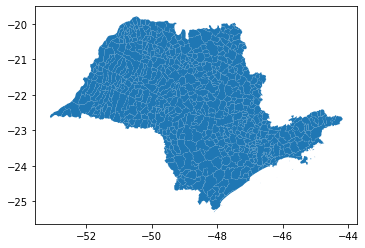

In [6]:
sp.plot()

In [7]:
rp = sp.query("NM_MUN == 'Ribeirão Preto'")

In [8]:
rp

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
487,3543402,Ribeirão Preto,SP,650.916,"POLYGON ((-47.78684 -21.06144, -47.78614 -21.0..."


In [9]:
gs_rp = gpd.GeoSeries(rp['geometry'])
crs_rp = gs_rp.to_crs(epsg=3857)

#CALCULANDO O KM² DE RIBEIRAO PRETO

km2_rp = crs_rp.area/10**6
km2_rp

487    752.68187
dtype: float64

In [10]:
area_car_rp = gpd.read_file('cars/sp/ribeirao_preto/area_imovel/AREA_IMOVEL.shp')

In [11]:
#CONVERTENDO AS DIMENSOES DO CAR PARA KM² E ARMAZENANDO NO GEODATAFRAME

area_car_rp['KM2'] = gpd.GeoSeries(area_car_rp['geometry']).to_crs(epsg=3857).area/10**6
area_car_rp.head()

,COD_IMOVEL,NUM_AREA,COD_ESTADO,NOM_MUNICI,NUM_MODULO,TIPO_IMOVE,SITUACAO,CONDICAO_I,geometry,KM2
0,SP-3543402-874931A79D204F1C8151160F0D94D357,1126.730800,SP,RibeirÃ£o Preto,112.3645,IRU,CA,CANCELADO_POR_DECISAO_ADMINISTRATIVA,"POLYGON ((-47.93480 -21.31313, -47.93540 -21.3...",13.043538
1,SP-3543402-496C92E7B13746D6A3F2475ADD83DBD7,36.252147,SP,RibeirÃ£o Preto,3.6252,IRU,CA,CANCELADO_POR_DECISAO_ADMINISTRATIVA,"POLYGON ((-47.82711 -21.29994, -47.82741 -21.2...",0.419684
2,SP-3543402-94CB12F6E2F4424C9500E4508F17B287,114.441275,SP,RibeirÃ£o Preto,11.2072,IRU,AT,Aguardando anÃ¡lise,"POLYGON ((-47.87701 -21.24955, -47.87798 -21.2...",1.323910
3,SP-3543402-32BCE77BEE3B440EB4B835B994BDA84D,13.212333,SP,RibeirÃ£o Preto,1.1267,IRU,AT,Aguardando anÃ¡lise,"POLYGON ((-47.70495 -21.20731, -47.70597 -21.2...",0.152764
4,SP-3543402-07FED07E13D9443E8B0636CEB89E522D,2.528659,SP,RibeirÃ£o Preto,0.2458,IRU,AT,Aguardando anÃ¡lise,"POLYGON ((-47.83023 -21.31884, -47.83061 -21.3...",0.029282


<AxesSubplot:>

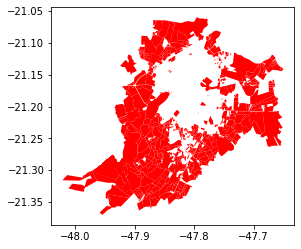

In [12]:
area_car_rp.plot(color='red')

<AxesSubplot:>

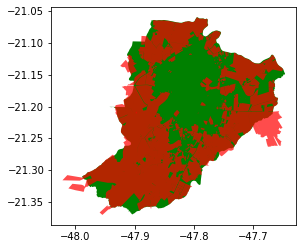

In [31]:
# INDICANDO AS SOBREPOSICOES
index_sobreposicao = area_car_rp['geometry'].apply(lambda x: area_car_rp['geometry'].overlaps(x)).values.astype(int)

# CONECTANDO OS COMPONENTES
n, ids = connected_components(index_sobreposicao)

# AGREGACAO COM DISSOLVE
df = gpd.GeoDataFrame({'geometry': area_car_rp['geometry'], 'group': ids})
area_car_sem_sobreposicao = df.dissolve(by='group')

rp_green = rp.plot(color='green')
area_car_sem_sobreposicao.plot(ax=rp_green, alpha=0.7, color='red')

In [32]:
intercessao = gpd.overlay(area_car_sem_sobreposicao, rp, how='intersection')
intercessao['LABEL'] = 'Cadastro Ambiental Rural'
intercessao.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,LABEL
0,3543402,Ribeirão Preto,SP,650.916,"MULTIPOLYGON (((-47.94221 -21.35649, -47.94209...",Cadastro Ambiental Rural
1,3543402,Ribeirão Preto,SP,650.916,"POLYGON ((-47.88007 -21.25436, -47.88086 -21.2...",Cadastro Ambiental Rural
2,3543402,Ribeirão Preto,SP,650.916,"POLYGON ((-47.73104 -21.26057, -47.73116 -21.2...",Cadastro Ambiental Rural
3,3543402,Ribeirão Preto,SP,650.916,"POLYGON ((-47.72047 -21.16774, -47.72382 -21.1...",Cadastro Ambiental Rural
4,3543402,Ribeirão Preto,SP,650.916,"POLYGON ((-47.83114 -21.11868, -47.83283 -21.1...",Cadastro Ambiental Rural


In [33]:
gs_intercessao = gpd.GeoSeries(intercessao['geometry'])
crs_intercessao = gs_intercessao.to_crs(epsg=3857)

#CALCULANDO O KM² DA INTERCESSAO ENTRE OS CARS E RIBEIRAO PRETO
km2_intercessao = crs_intercessao.area/10**6
km2_intercessao.sum()

469.74057462804194

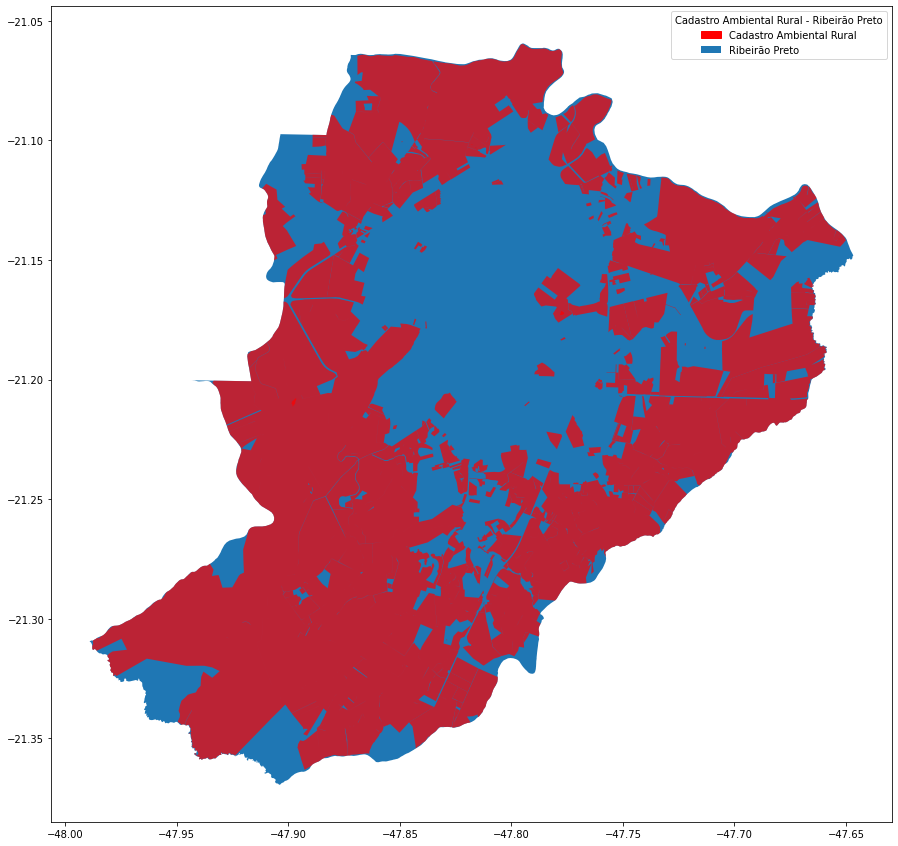

In [35]:
fig, ax = plt.subplots(figsize  = (25, 15))
rp_plot = rp.plot(ax=ax)
plot_intercessao = intercessao.plot(ax=rp_plot, color='red', alpha=0.7)
leg_cadastro = mpatches.Patch(color='red', label='Cadastro Ambiental Rural')
leg_rp = mpatches.Patch(label='Ribeirão Preto')
plt.legend(title='Cadastro Ambiental Rural - Ribeirão Preto', handles=[leg_cadastro, leg_rp])